In [4]:
import pandas as pd
from matplotlib import pyplot, pyplot as plt
from pandas import to_datetime
from prophet import Prophet
import pandas_datareader.data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brent updated.csv to brent updated.csv


This code will first display the original series and then perform the prophet prediciton for a period of 90 days. 

[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2007-07-30  75.849998  76.529999  75.440002  75.739998  75.739998    2575
1 2007-07-31  75.699997  77.169998  75.669998  77.050003  77.050003    3513
2 2007-08-01  77.000000  77.059998  74.860001  75.349998  75.349998    3930
3 2007-08-02  75.220001  76.209999  74.269997  75.760002  75.760002    6180
4 2007-08-03  75.389999  76.000000  74.529999  74.750000  74.750000    4387
          ds          y
0 2007-07-30  75.739998
1 2007-07-31  77.050003
2 2007-08-01  75.349998
3 2007-08-02  75.760002
4 2007-08-03  74.750000
             ds          y
3858 2023-02-15  85.379997
3859 2023-02-16  85.139999
3860 2023-02-17  83.000000
3861 2023-02-21  83.050003
3862 2023-02-22  80.599998


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0r2wsnc/r48xir5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0r2wsnc/0kmhkv3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36205', 'data', 'file=/tmp/tmpg0r2wsnc/r48xir5w.json', 'init=/tmp/tmpg0r2wsnc/0kmhkv3m.json', 'output', 'file=/tmp/tmpg0r2wsnc/prophet_model3zojmo2d/prophet_model-20230223174754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds
3948 2023-05-19
3949 2023-05-20
3950 2023-05-21
3951 2023-05-22
3952 2023-05-23
             ds        yhat  yhat_lower  yhat_upper
3948 2023-05-19  112.692757  100.731073  124.009475
3949 2023-05-20  109.395380   97.128965  121.973714
3950 2023-05-21  109.472847   97.067366  121.625180
3951 2023-05-22  112.857422  101.132001  124.392037
3952 2023-05-23  112.946936  100.015610  125.122727


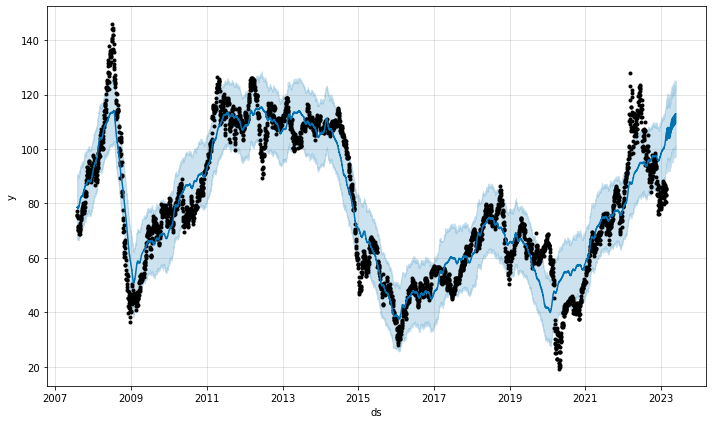

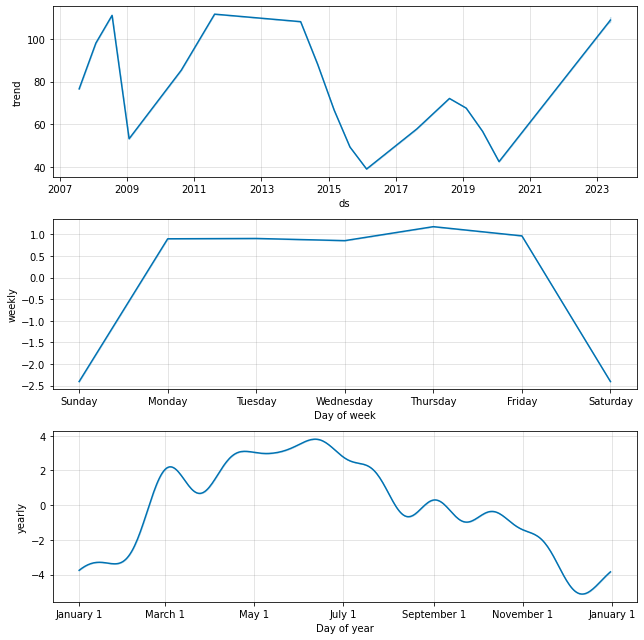

In [5]:
# We can add and delete any ticker from the list to get desired ticker live data
today = date.today()


# Set the start and end dates for the data
start_date = '2005-01-01'


# Set the stock symbol you want to retrieve data for
symbol = 'BZ=F'

# Use pandas_datareader to retrieve the data
df = pdr.get_data_yahoo(symbol, start=start_date, end=today)
df = df.reset_index()
print(df.head())

#df = df.set_index('Date')

# Select only the 'ds' and 'y' columns from the DataFrame
df = df[['Date', 'Close']]

# Rename the columns to match the Prophet input format
df.columns = ['ds', 'y']

# Convert the 'ds' column to a datetime format
df['ds'] = to_datetime(df['ds'])

# Print the data
print(df.head())
print(df.tail())

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=90)
print(future.tail())

forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
m.plot(forecast)
pyplot.show()

m.plot_components(forecast)
pyplot.show()

This piece of code will perfom cross-validation on the regression to check and check the performance. It will split the data into proportional chunks and will iterate over a fold of 45 days. The prediciton horizon will remain the same. 

In [6]:
#cross- validation
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, period='45 days', horizon='90 days')
print(df_cv.head())


INFO:prophet:Making 117 forecasts with cutoffs between 2008-08-09 00:00:00 and 2022-11-24 00:00:00


  0%|          | 0/117 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0r2wsnc/auzne2xj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0r2wsnc/dl2ataz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89074', 'data', 'file=/tmp/tmpg0r2wsnc/auzne2xj.json', 'init=/tmp/tmpg0r2wsnc/dl2ataz3.json', 'output', 'file=/tmp/tmpg0r2wsnc/prophet_modelh03dx08n/prophet_model-20230223174824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0r2wsnc/7l7ns763.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0r2wsnc/jj5p84kz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

          ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 2008-08-11  116.396954  113.563886  118.999860  112.669998 2008-08-09
1 2008-08-12  115.733765  112.926274  118.451140  111.150002 2008-08-09
2 2008-08-13  115.902550  113.312789  118.488951  113.470001 2008-08-09
3 2008-08-14  115.780632  113.140269  118.192045  113.680000 2008-08-09
4 2008-08-15  116.015869  113.177580  118.559218  112.550003 2008-08-09


This part will show a chart with performance metrics such as MAPE ans MSE. From the graph it can be inferred that as we increase our prediction horizon, the MAPE will be worse (increase) which is normal behaviour. 

  horizon         mse       rmse        mae      mape     mdape     smape  \
0  9 days  186.768134  13.666314   9.903585  0.161394  0.094884  0.156530   
1 10 days  191.871396  13.851765  10.086330  0.162569  0.097469  0.158603   
2 11 days  204.707686  14.307609  10.450562  0.169419  0.102140  0.164465   
3 12 days  208.793517  14.449689  10.582614  0.171094  0.102661  0.166667   
4 13 days  208.563997  14.441745  10.644167  0.169144  0.105550  0.166468   

   coverage  
0  0.499171  
1  0.493458  
2  0.482117  
3  0.475132  
4  0.466842  
   horizon         mse       rmse        mae      mape     mdape     smape  \
77 86 days  491.061851  22.159915  17.243788  0.266328  0.215157  0.287991   
78 87 days  509.628520  22.574953  17.527404  0.272617  0.216314  0.293849   
79 88 days  523.339420  22.876613  17.820138  0.279452  0.223625  0.300152   
80 89 days  520.555929  22.815695  17.784494  0.278836  0.219980  0.297363   
81 90 days  529.752818  23.016360  17.866143  0.281209  0.21998

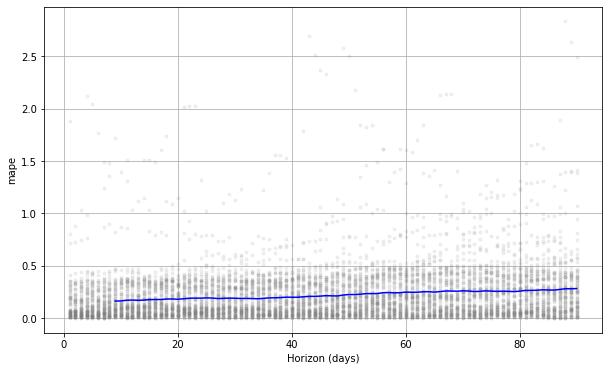

In [7]:
#performance metrics
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
print(df_p.head())
print(df_p.tail())

#plot
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()